In [1]:
import sys
from pathlib import Path

In [78]:
!{sys.executable} -m pip install -e ..

Obtaining file:///home/ajkdrag/workspace/chequeparser
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 6.0 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 9.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached protobuf-4.25.2-cp37-abi3-manylinux2014_x86_64.whl.metadata (541 bytes)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 10.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.1/330.1 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━

In [3]:
%load_ext autoreload
%autoreload 3 -p
%matplotlib inline

## imports

In [42]:
from chequeparser.wrappers.results import DetectionResults
from chequeparser.utilities.ds_utils import concat_ds

In [43]:
from chequeparser.datasets.fileds import FileDS
from chequeparser.datasets.imageds import ImageDS

In [66]:
from chequeparser.models.arch import UL_YOLO
from chequeparser.models.detection.ultralytics import UltralyticsDetect
from chequeparser.core.detector import detect

Reloading 'chequeparser.utilities.ds_utils'.


In [80]:
from doctr.models import ocr_predictor

## config

In [67]:
dir_images = "../data/coco128/train/images/"

## test pkg

In [68]:
file_ds = FileDS(dir_images)

  0%|          | 0/128 [00:00<?, ?it/s]

2024-02-12 16:20:49.971 | INFO     | chequeparser.utilities.io_utils:get_image_files:30 - Found 128 image files.


In [12]:
model = UltralyticsDetect("../pretrained/yolov8n.pt", arch=UL_YOLO)

In [13]:
len(file_ds)

128

In [14]:
sample_ds = file_ds.sample(batched=False)

5


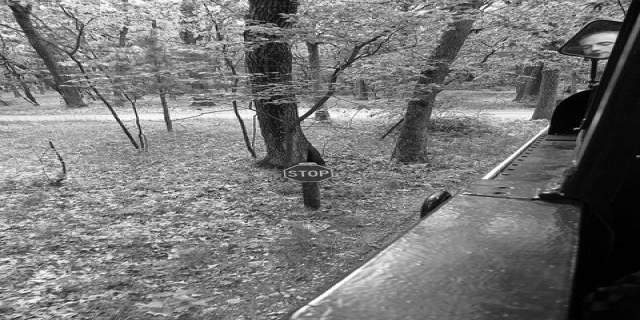

In [15]:
print(len(sample_ds))
sample_ds[0]

In [69]:
results = detect(model, sample_ds, stream=False)

2024-02-12 16:20:52.274 | INFO     | chequeparser.core.detector:detect:17 - Stream mode: False
2024-02-12 16:20:52.274 | INFO     | chequeparser.core.detector:detect:18 - Batched mode: False
2024-02-12 16:20:52.275 | INFO     | chequeparser.core.detector:detect:19 - Running predict on 5 samples



0: 320x640 2 persons, 1 car, 1 bird, 6.3ms
Speed: 0.8ms preprocess, 6.3ms inference, 1.7ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 1 chair, 6.1ms
Speed: 0.8ms preprocess, 6.1ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 3 persons, 1 bicycle, 1 dog, 5.9ms
Speed: 0.7ms preprocess, 5.9ms inference, 2.1ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 1 cat, 5.9ms
Speed: 0.8ms preprocess, 5.9ms inference, 1.1ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 2 persons, 5.6ms
Speed: 0.7ms preprocess, 5.6ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 640)


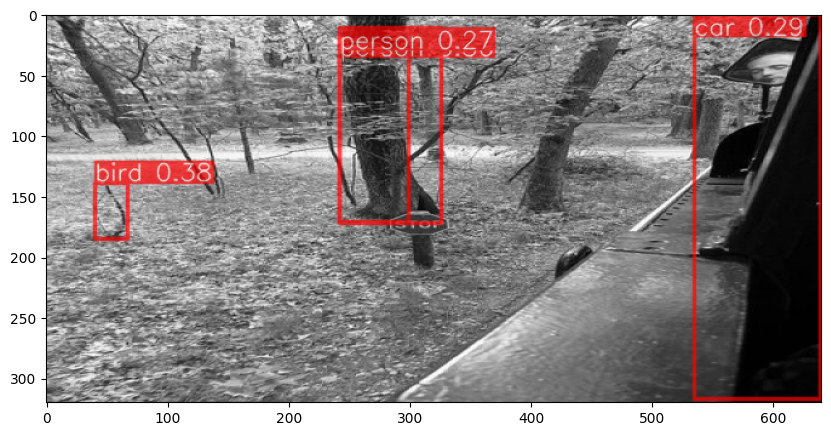

In [70]:
results[0].display(color=(255, 0, 0))

In [71]:
results_ds = concat_ds([result.create_ds() for result in results])

In [72]:
results_ds.parent_ds == sample_ds

True

### ocr

In [82]:
ocr_model = ocr_predictor(det_arch='db_resnet50', reco_arch='parseq',
              assume_straight_pages=True, pretrained=True)

In [86]:
ocr_results = ocr_model([np.array(results_ds[0])])

In [90]:
ocr_results.render()

''